# **Covid-19 Vaccines - Sentiment Analysis & Time Series**
Notebook for the second project for the Machine Learning Complements course (CAC).

## **Introduction**


## Imports

The following libraries will be used in this project:

In [1]:
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import utils as ut
import warnings
import seaborn as sns
import contractions
import nltk
import plotly.express as px
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.classify import NaiveBayesClassifier
nltk.download('vader_lexicon')
warnings.simplefilter(action='ignore')


[nltk_data] Downloading package wordnet to /home/oliveira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/oliveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/oliveira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/oliveira/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Load Data

In [2]:
df_tweets = pd.read_csv('tweets.csv')

## Initial Observations

The dataset contains a single file: `tweets.csv`.

In this section we will take a look at the first few rows of each file to get a better understanding of the data, and do some initial data exploration.

In [3]:
ut.initial_obs(df_tweets)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False



Attributes: ['id', 'user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'text', 'hashtags', 'source', 'retweets', 'favorites', 'is_retweet']
Entries: 228207
Attribute Count: 16

----Null Count----
id                      0
user_name               2
user_location       66911
user_description    17023
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64


## Data Understanding

## Data Pre-Processing
We can see that many attributes are not really relevant for the kind of work we will be doing. Therefore, we'll just selec tthe most relevant ones.

In [4]:
df_tweets = df_tweets[['id','user_location','date','text','hashtags','user_followers']]
pd.set_option('display.max_colwidth', None)

df_tweets['text'].head(5)
df_tweets['orig_text'] = df_tweets['text']

### Removing Spaces within the text
When removing spaces within the text, ensure seamless integration of words for enhanced readability and processing efficiency.

In [5]:
df_tweets['text'] = df_tweets['text'].apply(ut.trim_text)
df_tweets['text'].head(5)

0                                               Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1    While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm
2    #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P
3    Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4
4         Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq
Name: text, dtype: object

### Contractions Mapping
Contractions mapping simplifies language by expanding contractions like "can't" to "cannot" for consistent analysis and interpretation.

In [6]:
df_tweets['text'] = df_tweets['text'].apply(contractions.fix)
df_tweets['text'].head(5)

0                                                 Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1    While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we have ev… https://t.co/dlCHrZjkhm
2      #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P
3     Facts are immutable, Senator, even when you are not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4
4           Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq
Name: text, dtype: object

### Cleaning HTML
Cleaning HTML tags from text data streamlines content for NLP tasks, preventing interference from markup elements.

In [7]:
df_tweets['text'] = df_tweets['text'].apply(lambda x:re.sub(r"http\S+", "", x))
df_tweets['text'].head(5)

0                                                 Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech 
1    While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we have ev… 
2      #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… 
3     Facts are immutable, Senator, even when you are not ethically sturdy enough to acknowledge them. (1) You were born i… 
4           Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… 
Name: text, dtype: object

### Emojis & Emotion Handling
Emojis and emotion handling enrich text analysis by capturing nuances of sentiment and expression for deeper understanding. We thought about removing them initially, however their presence may be crucial to identify sentiments within the text.

In [8]:
pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251\U0001F004\U0001F0CF\U0001F170-\U0001F251\U0001F600-\U0001F64F\U0001F680-\U0001F6FF]+', flags=re.UNICODE)

# Find examples in df_tweets['text'] that have emojis
emojis_examples = df_tweets[df_tweets['text'].str.contains(pattern, na=False)][0:5]

for index in emojis_examples.index:
    print(df_tweets.loc[index, 'text'])

df_tweets['text'] = df_tweets['text'].apply(ut.convert_emojis_to_text)

print('\n')

for index in emojis_examples.index:
    emoji_text = df_tweets.loc[index, 'text']
    print(emoji_text)

💉 #Vaccine #TrumpVaccine #AstraZeneca #PfizerBioNTech #Pfizervaccine #PfizerCovidVaccine #Pfizer's COVID-19 belong… 
@ZubyMusic 6 deaths so far. It is only death, nothing to worry about then 🤔 #CovidVaccines #Pfizervaccine… 
Ladies and Gentlemen, now we have #CovidVaccine experts in each and every household of #Pakistan #PfizerBioNTech #oxfordvaccine 🤦‍♂️
When The #CovidVaccine Poisons Enough Of The LEFT With "Side Effects" Like #BellsPalsy Or ☠️ As They Are Flocking… 
I have never been so excited to get a vaccine 💉💉💉 #CovidVaccine #PfizerBioNTech #VaccinesSaveLives #VaccinesWork 


syringe #Vaccine #TrumpVaccine #AstraZeneca #PfizerBioNTech #Pfizervaccine #PfizerCovidVaccine #Pfizer's COVID-19 belong… 
@ZubyMusic 6 deaths so far. It is only death, nothing to worry about then thinking face #CovidVaccines #Pfizervaccine… 
Ladies and Gentlemen, now we have #CovidVaccine experts in each and every household of #Pakistan #PfizerBioNTech #oxfordvaccine man facepalming
When The #CovidVaccine 

### Handling Twitter Handles (@) & Hashtags
Handling Twitter handles (@) and hashtags facilitates contextual analysis and topic extraction in social media text. We removed the twitter handle, as they mostly are used to identify persons therefore they are not very important in this matter. On the other hand, hashtags may indicate sentiments or other important informations like topics. e.g #sad, #happy or #astrozeneca

In [9]:
df_tweets['text'] = df_tweets['text'].apply(ut.remove_twitter_handles_hashtags)

for index in emojis_examples.index:
    emoji_text = df_tweets.loc[index, 'text']
    print(emoji_text)

syringe Vaccine TrumpVaccine AstraZeneca PfizerBioNTech Pfizervaccine PfizerCovidVaccine Pfizer's COVID-19 belong… 
 6 deaths so far. It is only death, nothing to worry about then thinking face CovidVaccines Pfizervaccine… 
Ladies and Gentlemen, now we have CovidVaccine experts in each and every household of Pakistan PfizerBioNTech oxfordvaccine man facepalming
When The CovidVaccine Poisons Enough Of The LEFT With "Side Effects" Like BellsPalsy Or skull and crossbones As They Are Flocking… 
I have never been so excited to get a vaccine syringesyringesyringe CovidVaccine PfizerBioNTech VaccinesSaveLives VaccinesWork 


### Convert text to lower-case
Converting all the characters to lower case so that words in different forms can be interpreted as the same. The problem with this is that in social media people may use upper-case to express sentiments, e.g SAD, HAPPY.

Here we also remove special characters, keeping only characters.

In [10]:
df_tweets['text'] = df_tweets['text'].apply(ut.remove_special_characters)

df_tweets['text'] = df_tweets['text'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
df_tweets['text'] = df_tweets['text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

df_tweets['text'] = df_tweets['text'].str.lower()

### Tokenization
Tokenization breaks down text into individual units, such as words or phrases, enabling granular analysis and feature extraction. We also remove stopwords, meaning words that often appear within the text and don't add any meaning to it.

In [11]:
df_tweets['tokenized_text'] = df_tweets['text'].apply(lambda x: word_tokenize(x))
df_tweets['tokenized_text'] = df_tweets['tokenized_text'].apply(ut.remove_stopwords)
df_tweets['token_text'] = df_tweets['tokenized_text'].apply(lambda text: " ".join(text))


df_tweets['tokenized_text'].head(5)

0                                       [folks, said, daikon, paste, could, treatcytokine, storm, pfizerbiontech]
1                                [world, wrong, side, history, year, hopefully, biggest, vaccination, effort, ev]
2    [coronavirus, sputnikv, astrazeneca, pfizerbiontech, moderna, covid, russian, vaccine, created, last, years]
3                            [facts, immutable, senator, even, not, ethically, sturdy, enough, acknowledge, born]
4                                                [explain, needvaccine, whereareallthesickpeople, pfizerbiontech]
Name: tokenized_text, dtype: object

### Stemming
Stemming typically chops off prefixes and/or suffixes of words to derive the root form. It's a simpler and faster process compared to lemmatization. However, stemming doesn't always result in valid words. For instance, "running" might be stemmed to "runn," which isn't a valid word.

In [12]:
stemmer = PorterStemmer()
df_tweets['stemmed_text'] = df_tweets['tokenized_text'].apply(lambda x: [stemmer.stem(word) for word in x])

df_tweets['stemmed_text'].head(5)

0                                     [folk, said, daikon, past, could, treatcytokin, storm, pfizerbiontech]
1                                     [world, wrong, side, histori, year, hope, biggest, vaccin, effort, ev]
2    [coronaviru, sputnikv, astrazeneca, pfizerbiontech, moderna, covid, russian, vaccin, creat, last, year]
3                                   [fact, immut, senat, even, not, ethic, sturdi, enough, acknowledg, born]
4                                             [explain, needvaccin, whereareallthesickpeopl, pfizerbiontech]
Name: stemmed_text, dtype: object

### Lemmatization
Lemmatization, on the other hand, involves resolving words to their dictionary form, known as the lemma. It uses lexical knowledge bases to ensure that the root form returned is a valid word. For example, "am," "are," and "is" would all be lemmatized to "be." Lemmatization is generally more accurate than stemming but can be slower due to its linguistic complexity.

In [13]:
lemmatizer = WordNetLemmatizer()
df_tweets['lemmatized_text'] = df_tweets['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df_tweets['lemmatized_text'].head(5)
df_tweets['clean_text'] = df_tweets['lemmatized_text'].apply(lambda text: " ".join(text))


## Sentiment Analysis - Using VADER

In [14]:
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    vader_scores = sid.polarity_scores(text)['compound']
    if vader_scores >= 0.05:
        sentiment = 'Positive'
    elif vader_scores <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return sentiment, vader_scores

df_tweets['sentiment'], df_tweets['vader_score'] = zip(*df_tweets['text'].apply(analyze_sentiment))
#df_tweets['sentiment'] = df_tweets['sentiment'].replace({'Positive': 1, 'Neutral': 0, 'Negative': -1})

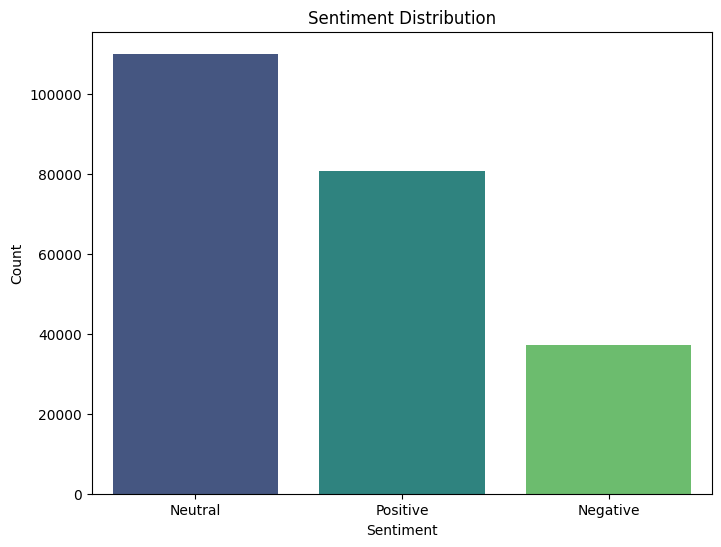

In [15]:
ut.plot_sentiments(df_tweets)

### WordClouds

#### Positive Sentiment - WordCloud

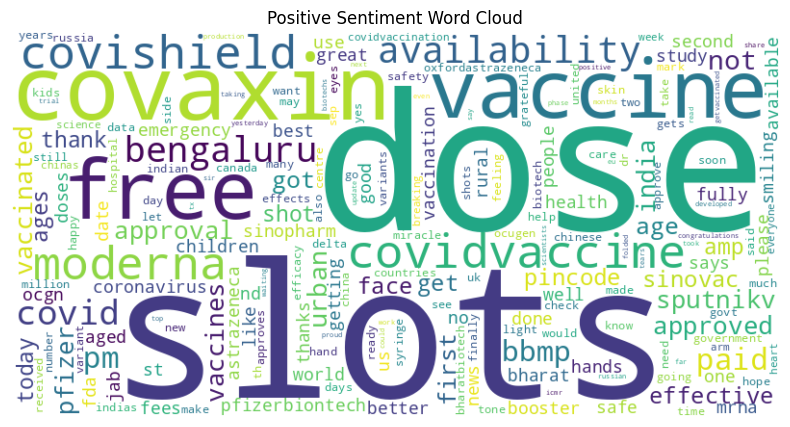

2     coronavirus sputnikv astrazeneca pfizerbiontech moderna covid russian vaccine created last year
5                        anyone useful adviceguidance whether covid vaccine safe whilst breastfeeding
6                        isbit sad claim fame success vaccination patriotic competition usa canada uk
7                                               not many bright day best bidenharris winning election
11               covid covidvaccine vaccine corona pfizerbiontech bbcnews nytimes bbcnews best wish u
Name: clean_text, dtype: object

In [16]:
positive_tweets = df_tweets[df_tweets['sentiment'] == "Positive"]
negative_tweets = df_tweets[df_tweets['sentiment'] == "Negative"]
neutral_tweets = df_tweets[df_tweets['sentiment'] == "Neutral"]

ut.generate_word_cloud(positive_tweets['token_text'], 'Positive Sentiment Word Cloud')
positive_tweets['clean_text'].head(5)

In [17]:
ut.common_words(positive_tweets, 50)

#### Neutral Sentiment - WordCloud

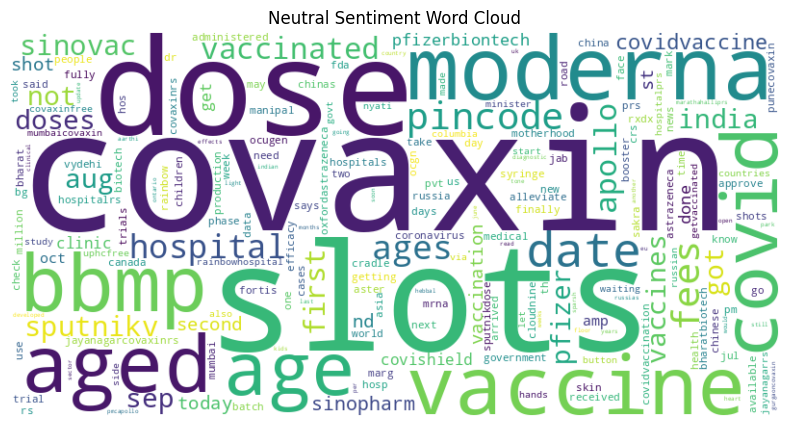

0                                  folk said daikon paste could treatcytokine storm pfizerbiontech
3                         fact immutable senator even not ethically sturdy enough acknowledge born
4                                      explain needvaccine whereareallthesickpeople pfizerbiontech
8                                  covid vaccine getting covidvaccine covid pfizerbiontech moderna
9    covidvaccine state start getting covidvaccine monday u say pakustv nyc healthcare globalgoals
Name: clean_text, dtype: object

In [18]:
ut.generate_word_cloud(neutral_tweets['token_text'], 'Neutral Sentiment Word Cloud')
neutral_tweets['clean_text'].head(5)

In [19]:
ut.common_words(neutral_tweets, 50)

#### Negative Sentiment - WordCloud

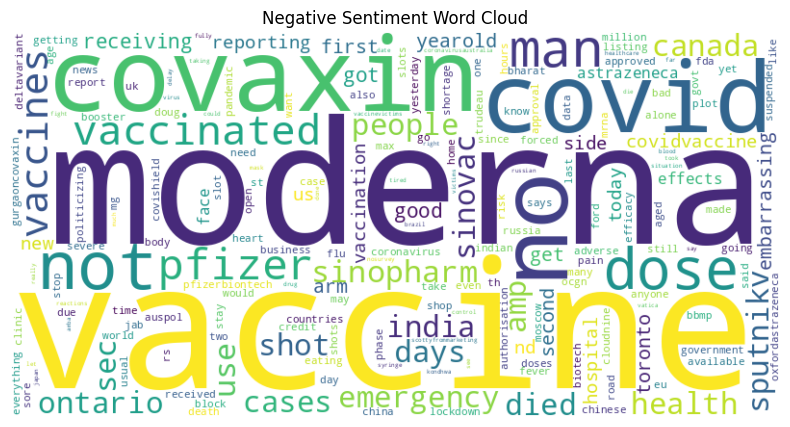

1                              world wrong side history year hopefully biggest vaccination effort ev
18                                         rake billion expensive covidvaccine refuse cut price lowe
19    trump administration failed deliver vaccine promise shocker covidiots coronavirus covidvaccine
23           u food drug administration fda granted emergency use authorization pfizerbiontechs mrna
25                                   no done thankyounhs pfizerbiontech making covidvaccine dream po
Name: clean_text, dtype: object

In [20]:
ut.generate_word_cloud(negative_tweets['token_text'], 'Negative Sentiment Word Cloud')
negative_tweets['clean_text'].head(5)

In [21]:
ut.common_words(negative_tweets, 50)

### N-Gram Analysis by sentiment

#### Uni-Gram

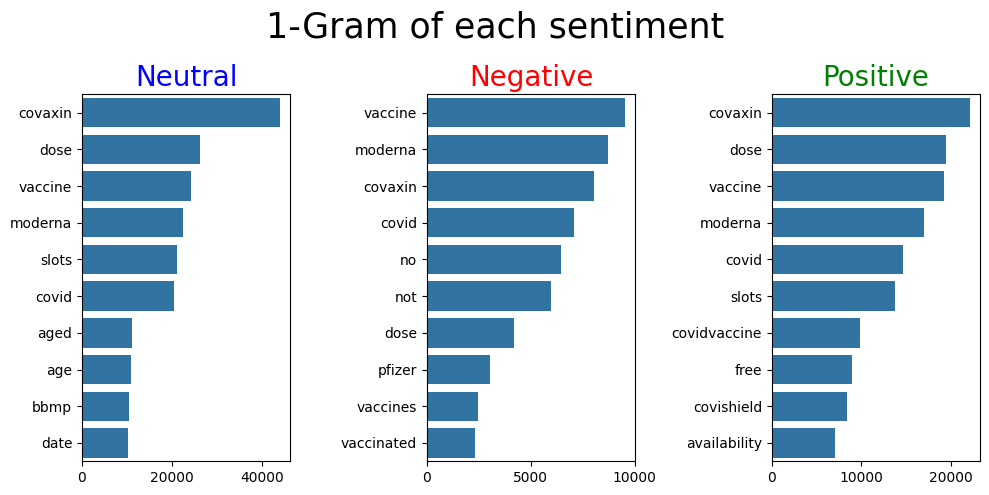

In [22]:
ut.plot_n_grams(df_tweets, 1)

#### Bi-Gram

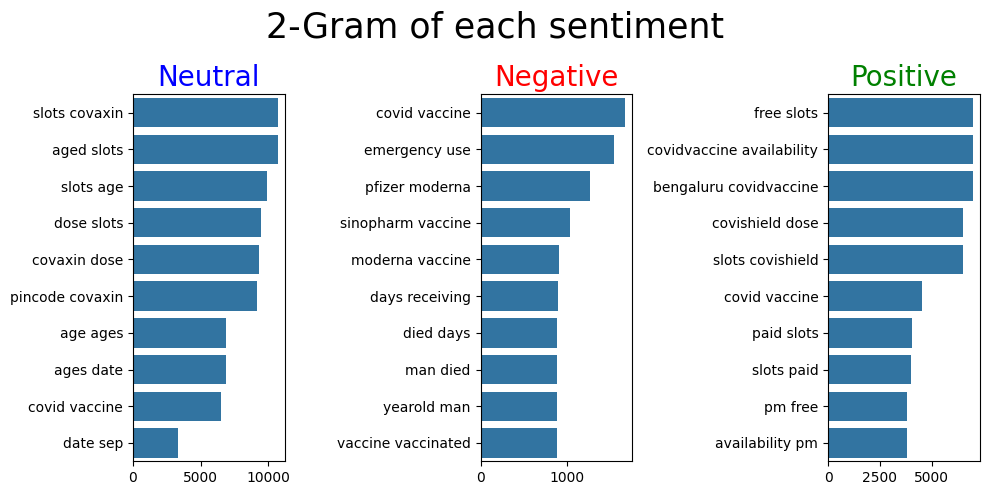

In [23]:
ut.plot_n_grams(df_tweets, 2)

#### Tri-Gram

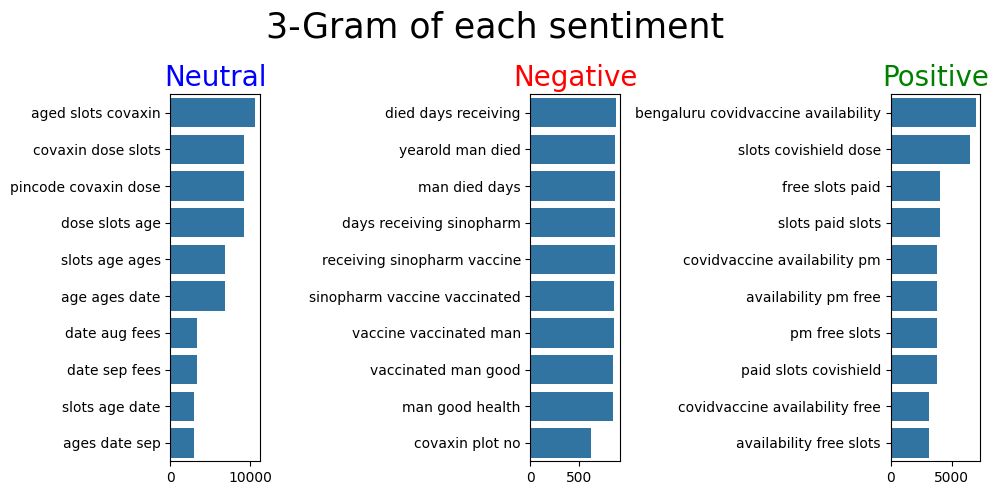

In [24]:
ut.plot_n_grams(df_tweets, 3)

### Plotting Average Word Amount by Sentiment

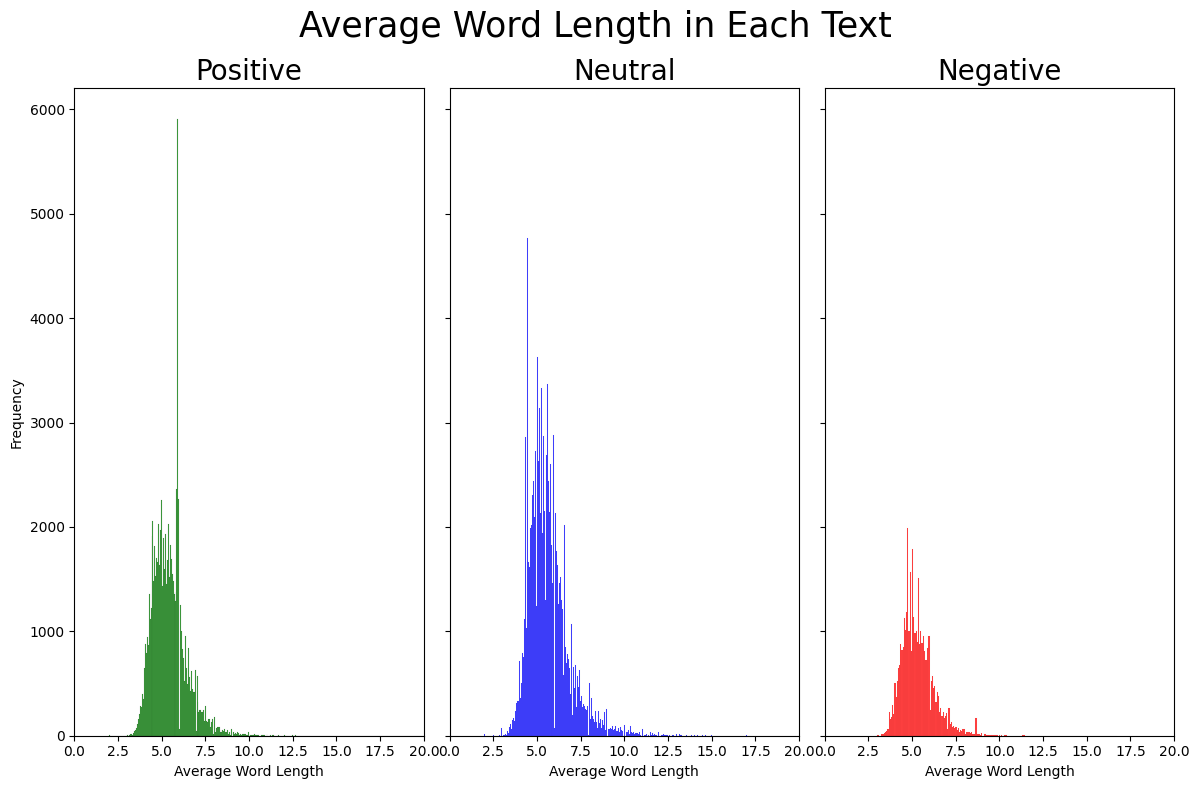

In [25]:
ut.plot_avg_word_length_distribution_multi(positive_tweets, neutral_tweets, negative_tweets)



## Sentiment Analysis - Typical ML Approach
As we can see our dataset is not labelled, therefore we can't separate it into train/test and just train a model. What we will do is train a model using a labelled tweet dataset (the theme of both dataset would be similar, so we can use it for training) and then test on our dataset.

In [26]:
"""
training_df = pd.read_csv('train_tweets.csv')
training_df = training_df[training_df['new_sentiment'].notna()]
training_df = training_df[['old_text','new_sentiment']]


training_df = ut.pre_process_pipeline(training_df,'old_text')
training_df.rename(columns={'new_sentiment': 'sentiment'}, inplace=True)
training_df['sentiment'] = training_df['sentiment'].replace({'positive': 1, 'neutral': 0, 'negative': -1})

ut.initial_obs(training_df)"""

"\ntraining_df = pd.read_csv('train_tweets.csv')\ntraining_df = training_df[training_df['new_sentiment'].notna()]\ntraining_df = training_df[['old_text','new_sentiment']]\n\n\ntraining_df = ut.pre_process_pipeline(training_df,'old_text')\ntraining_df.rename(columns={'new_sentiment': 'sentiment'}, inplace=True)\ntraining_df['sentiment'] = training_df['sentiment'].replace({'positive': 1, 'neutral': 0, 'negative': -1})\n\nut.initial_obs(training_df)"

### Generating Training-Features

In [27]:
"""
train_features, test_features = ut.generate_features(training_df,df_tweets,'tfidf')

#TF-IDF Results:
pred_nb_tfidf, pred_svm_tfidf = ut.predict_labels(train_features,training_df['sentiment'].values,test_features)

df_tweets['predicted_tfidf_NB'] = pred_nb_tfidf
df_tweets['predicted_tfidf_SVM'] = pred_svm_tfidf


df_eval = df_tweets.copy()
df_eval = df_eval[['clean_text','text','sentiment','predicted_tfidf_NB','predicted_tfidf_SVM']]

import seaborn as sns

sentiment_counts = df_eval['predicted_tfidf_NB'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()"""

'\ntrain_features, test_features = ut.generate_features(training_df,df_tweets,\'tfidf\')\n\n#TF-IDF Results:\npred_nb_tfidf, pred_svm_tfidf = ut.predict_labels(train_features,training_df[\'sentiment\'].values,test_features)\n\ndf_tweets[\'predicted_tfidf_NB\'] = pred_nb_tfidf\ndf_tweets[\'predicted_tfidf_SVM\'] = pred_svm_tfidf\n\n\ndf_eval = df_tweets.copy()\ndf_eval = df_eval[[\'clean_text\',\'text\',\'sentiment\',\'predicted_tfidf_NB\',\'predicted_tfidf_SVM\']]\n\nimport seaborn as sns\n\nsentiment_counts = df_eval[\'predicted_tfidf_NB\'].value_counts()\nplt.figure(figsize=(8, 6))\nsns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")\nplt.title(\'Sentiment Distribution\')\nplt.xlabel(\'Sentiment\')\nplt.ylabel(\'Count\')\nplt.show()'

## Geo-Spatial Sentiment Analysis

## Time-Series Analysis

In [28]:
# Get tweets for vaccine Pfizer,Pfizer; Sinopharm;Sinovac;Moderna;AstraZeneca;Covaxin;Sputnik V.
df_tweets_pz = df_tweets[df_tweets['clean_text'].str.contains('pfizer', case=False, na=False)]
df_tweets_sinopharm = df_tweets[df_tweets['clean_text'].str.contains('sinopharm', case=False, na=False)]
df_tweets_sinovac = df_tweets[df_tweets['clean_text'].str.contains('sinovac', case=False, na=False)]
df_tweets_moderna = df_tweets[df_tweets['clean_text'].str.contains('moderna', case=False, na=False)]
df_tweets_astrazeneca = df_tweets[df_tweets['clean_text'].str.contains('astrazeneca', case=False, na=False)]
df_tweets_covaxin = df_tweets[df_tweets['clean_text'].str.contains('covaxin', case=False, na=False)]
df_tweets_sputnik = df_tweets[df_tweets['clean_text'].str.contains('sputnik', case=False, na=False)]

print('Number of tweets for Pfizer:', len(df_tweets_pz))
print('Number of tweets for Sinopharm:', len(df_tweets_sinopharm))
print('Number of tweets for Sinovac:', len(df_tweets_sinovac))
print('Number of tweets for Moderna:', len(df_tweets_moderna))
print('Number of tweets for AstraZeneca:', len(df_tweets_astrazeneca))
print('Number of tweets for Covaxin:', len(df_tweets_covaxin))
print('Number of tweets for Sputnik V:', len(df_tweets_sputnik))

Number of tweets for Pfizer: 21823
Number of tweets for Sinopharm: 9056
Number of tweets for Sinovac: 11253
Number of tweets for Moderna: 48289
Number of tweets for AstraZeneca: 7313
Number of tweets for Covaxin: 72847
Number of tweets for Sputnik V: 17400


### Sentiment Over Time

In [29]:
df_tweets['date'] = pd.to_datetime(df_tweets['date'])
df_tweets['date'] = df_tweets['date'].dt.date

# Get counts of number of tweets by sentiment for each date
timeline = df_tweets.groupby(['date', 'sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index().dropna()

# Plot results

fig = px.line(timeline, x='date', y='tweets', color='sentiment', category_orders={'sentiment': ['neutral', 'negative', 'positive']},color_discrete_sequence=[ '#EF553B','#636EFA', '#00CC96'], title='Number of Tweets by Sentiment Over Time')
fig.show()

There are some spikes in the data, which may be due to some events that happened in the world. Let's investigate them further.

In [30]:
spike = df_tweets[df_tweets['date'].astype(str)=='2021-03-01']
spike['user_location'].value_counts().head(10)

user_location
India               258
New Delhi, India    138
patna                52
Mumbai, India        48
New Delhi            46
Bengaluru, India     32
Mumbai               28
Delhi                26
Hyderabad, India     24
Pune, India          22
Name: count, dtype: int64

In [31]:
spike = spike.sort_values('user_location', ascending=False)
spike['orig_text'].head()

18084                        Before magreact, do the research how the vaccine works, regardless the brands and the efficacy rates. #TheVaccineIsSafe #Sinovac
17555          I find this Photo by @cpimspeak\nTo be offensive and degrading , \nIt is depicting something truly against the commun… https://t.co/X51R4sFQYq
15285                 🇮🇳 PM Shri @narendramodi took his first dose of the #COVID19 #Vaccine at AIIMS Delhi today.\nHe led the way in… https://t.co/tKLRgz3vml
16532          Got call at 9 am from health department and mom got #COVAXIN shot at 1 pm.\n\nThey do really care about their citizen… https://t.co/VdMUMXS9Nx
16901    #mRNAvaccine #PfizerBionTech\n#Moderna #Katalinkariko\n#NianshuangWang #Mclellan\n\nAs for J&amp;J, Astrazeneca, the effcti… https://t.co/tK1U6LFboZ
Name: orig_text, dtype: object

It looks like the Prime Minister of India took the first dose of the Covid 19 vaccine on March 1st, 2021. This event caused a spike in the number of tweets and we can see that the sentiment is mostly positive.

#### Covaxin

In [32]:
def filtered_timeline(df, vax, title):
    df = df.dropna()
    title_str = 'Timeline showing sentiment of tweets about the '+title+' vaccine'
    vac_tweets = df_tweets[df_tweets['clean_text'].str.contains(vax, case=False, na=False)]
    
    timeline = vac_tweets.groupby(['date', 'sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index()
    fig = px.line(timeline, x='date', y='tweets', color='sentiment', color_discrete_map={'Positive': '#00CC96', 'Negative': '#EF553B', 'Neutral': '#636EFA'},title=title_str)

    fig.show()
    return vac_tweets

covaxin = filtered_timeline(df_tweets, 'covaxin', title='Covaxin')

#### Sinopharm

In [33]:
sinopharm = filtered_timeline(df_tweets, 'sinopharm', title='Sinopharm')
spike = sinopharm[sinopharm['date'].astype(str)=='2021-08-13']
print('Number of tweets on July 13th:', len(spike))


spike = spike.sort_values('user_location', ascending=False)

spike['orig_text'].head()

Number of tweets on July 13th: 862


158894    An 89-year-old man died just days after receiving #Sinopharm vaccine. The vaccinated man was in good health and had… https://t.co/1GhZlK6kEg
166022    An 89-year-old man died just days after receiving #Sinopharm vaccine. The vaccinated man was in good health and had… https://t.co/UkANdC5Rq1
166141    An 89-year-old man died just days after receiving #Sinopharm vaccine. The vaccinated man was in good health and had… https://t.co/G6tO6RsT5Y
162663            #Peru study finds #Sinopharm vaccine 50.4% effective against infections https://t.co/Zc9TwrR7Sh \n#Sharjah24 https://t.co/wM3DwZLg4J
165698    An 89-year-old man died just days after receiving #Sinopharm vaccine. The vaccinated man was in good health and had… https://t.co/wB3pXYRn2P
Name: orig_text, dtype: object

#### Sinovac

In [34]:
sinovac = filtered_timeline(df_tweets, 'sinovac', title='Sinovac')

#### Moderna

In [35]:
moderna = filtered_timeline(df_tweets, 'moderna', title='Moderna')

#### AztraZeneca

In [36]:
astrazeneca = filtered_timeline(df_tweets, 'astrazeneca', title='AstraZeneca')

#### Sputnik V

In [37]:
sputnik = filtered_timeline(df_tweets, 'sputnik', title='Sputnik V')

# Function to filter the data to a single date and print tweets from users with the most followers
def date_filter(df, date):
    return df[df['date'].astype(str)==date].sort_values('user_followers', ascending=False)[['date' ,'orig_text']]

def date_printer(df, dates, num=10): 
    for date in dates:
        display(date_filter(df, date).head(num))

dates = ['2021-04-12', '2021-05-14']

date_printer(sputnik, dates, num=5)

,date,orig_text
58286,2021-04-12,India to get its third #COVID19 vaccine; Subject Expert Committee recommends Russia's #SputnikV vaccine for Emergen… https://t.co/H29Jw655Db
58170,2021-04-12,Why is the vaccine named #SputnikV? How does the vaccine work?\n\nAll you need to know\nhttps://t.co/82TsLi0bBj
58395,2021-04-12,Panel grants emergency-use approval to Russia-made Covid vaccine #SputnikV\n\n(reports @RamblingBrook)… https://t.co/dy8SUIOKPw
57910,2021-04-12,India closer to getting 3rd #covid19 vaccine as panel clears Russia's #SputnikV \n\nDr Reddy's conducted clinical tri… https://t.co/AmXFskY8UV
55586,2021-04-12,Expert panel to meet today to decide on #SputnikV vaccine emergency approval\n\n#CovidVaccine… https://t.co/8SM56RsKHP


,date,orig_text
78025,2021-05-14,#JustIn | Dr Reddy's administers first dose of the #SputnikV vaccine in Hyderabad
77873,2021-05-14,"First doses of #SputnikV administered in India. Deepak Sapra, Global Head of Custom Pharma Services at @drreddys La… https://t.co/6psT3q60QX"
77834,2021-05-14,"#SputnikV (Imported) To Cost Rs 995/Shot, Made-In-India May Be Cheaper https://t.co/NQ9AkDEQwN https://t.co/CeOdM1VxfQ"
77285,2021-05-14,"#NDTVExclusive | “Pricing details of India-manufactured vaccine (#SputnikV) not decided”: Deepak Sapra, CEO and API… https://t.co/1O6OaYdMkS"
77269,2021-05-14,"#NDTVExclusive | “Approval of #SputnikV by WHO underway”: Deepak Sapra, CEO and API Services, Dr Reddy's Labs… https://t.co/z3Ewyx9X8N"


#### Pfizer

In [38]:
pfizer = filtered_timeline(df_tweets, 'pfizer', title='Pfizer')